#14757 Lecture 18

In [ ]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Visualizing the dataset with a panel plot

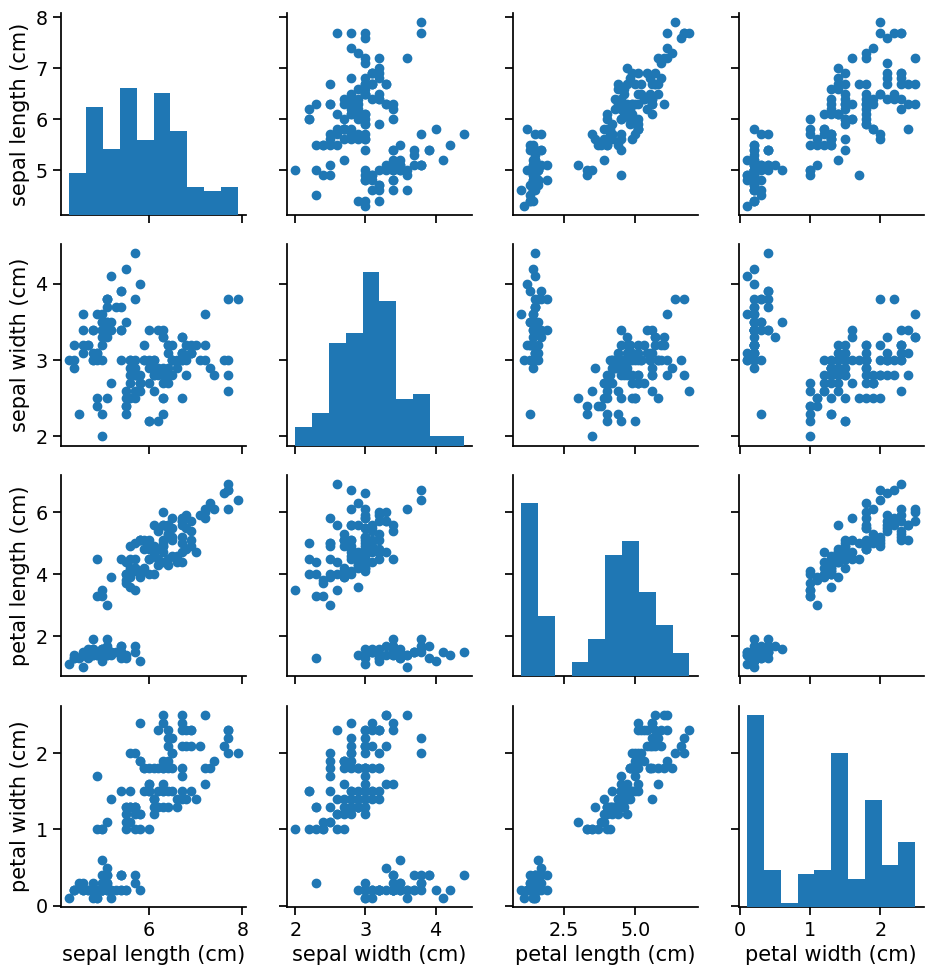

In [ ]:
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
panel_plot = sns.PairGrid(iris_df)
panel_plot.map_diag(plt.hist)
panel_plot.map_offdiag(plt.scatter);

# Standardizing each feature

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
iris_scaled = StandardScaler().fit_transform(iris_df)

# *k*-means clustering
Set *k* to be number of clusters

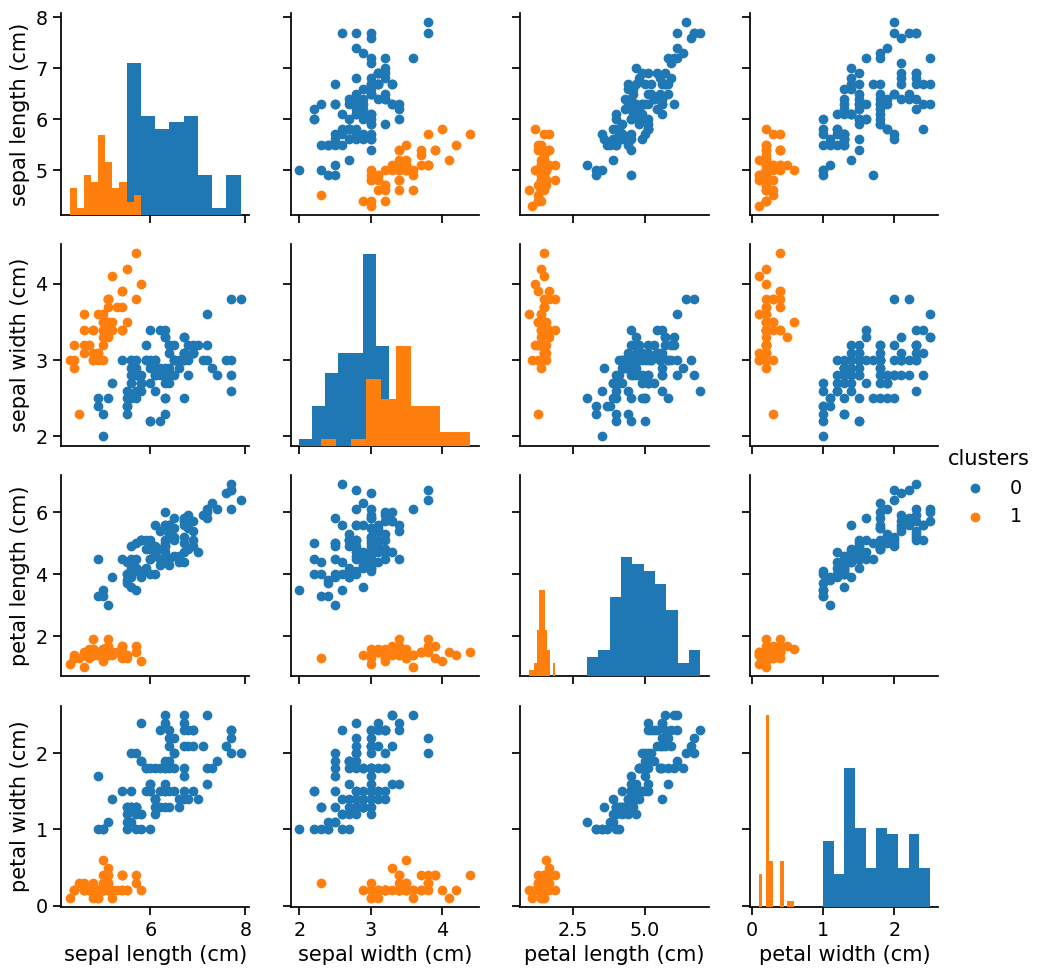

In [ ]:
k = 2
kmeans = KMeans(n_clusters = k, n_init='auto')
kmeans.fit(iris_scaled)

# plot panel scatter plot
iris_df['clusters'] = kmeans.labels_
panel_plot = sns.PairGrid(iris_df, vars=iris.feature_names, hue="clusters")
panel_plot.map_diag(plt.hist)
panel_plot.map_offdiag(plt.scatter)
panel_plot.add_legend()

# Visualizing the iris data with true labels

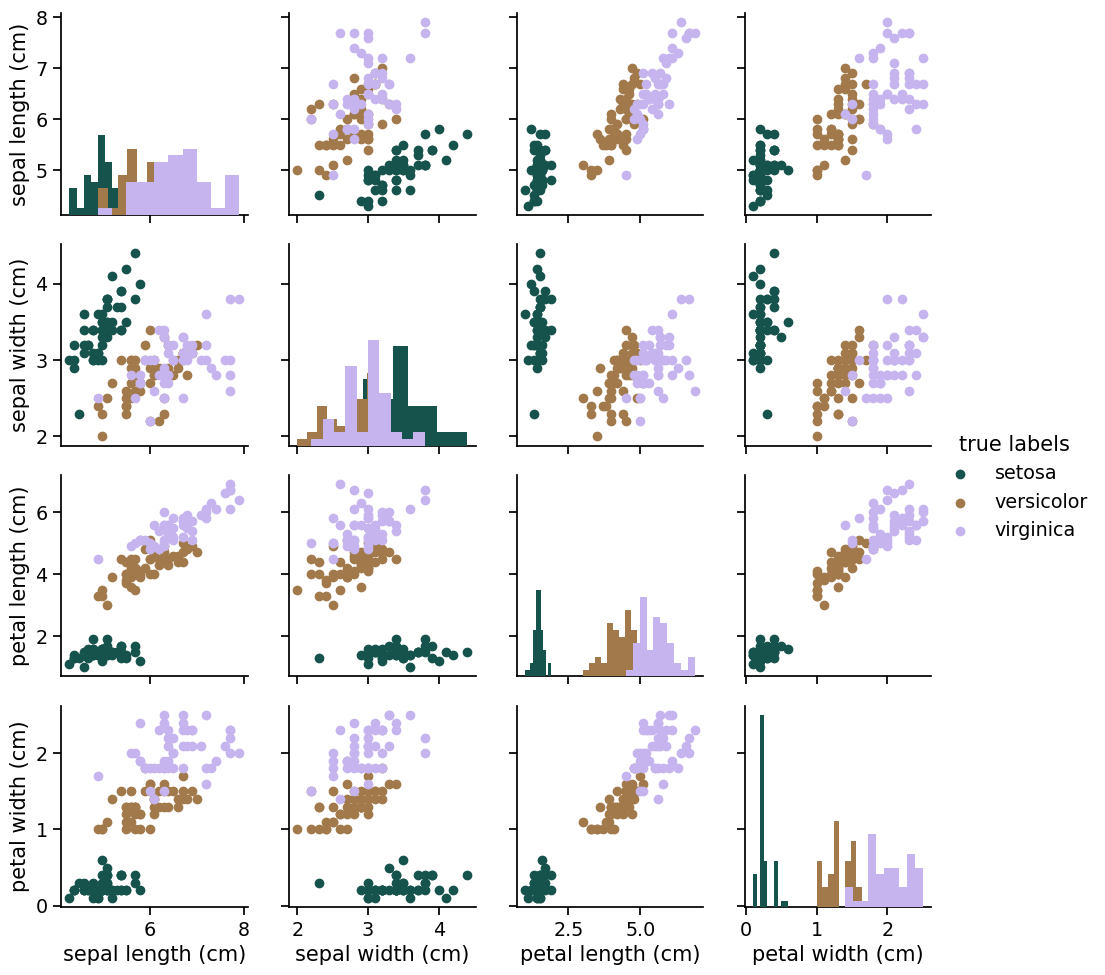

In [ ]:
iris_df['true labels'] = iris.target_names[iris.target]
panel_plot = sns.PairGrid(iris_df, vars=iris.feature_names, hue="true labels", palette="cubehelix")
panel_plot.map_diag(plt.hist)
panel_plot.map_offdiag(plt.scatter)
panel_plot.add_legend()

# Within clusters sum of squares vs. number of clusters *k*

Text(0, 0.5, 'within cluster sum of squares')

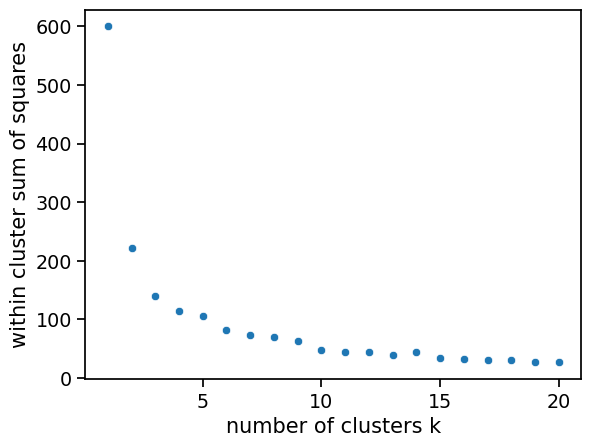

In [ ]:
ks = range(1,21)
sum_of_scaled_distances = []
for k in ks:
  kmeans = KMeans(n_clusters = k, n_init='auto')
  kmeans.fit(iris_scaled)
  # kmeans.inertia_ is the sum of scaled distances
  sum_of_scaled_distances.append(kmeans.inertia_)

ssd_plot = sns.scatterplot(x=ks, y=sum_of_scaled_distances)
plt.xlabel('number of clusters k')
plt.ylabel('within cluster sum of squares')